## Task 1

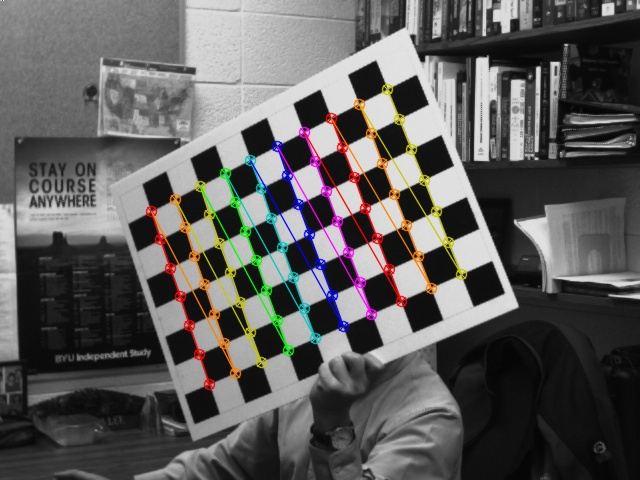

In [6]:
import numpy as np
import cv2 as cv
import os
from IPython.display import Image

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*10,3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:7].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

imagePath = os.path.join(os.getcwd(),'images','JPEG','AR1.jpg')
savePath = os.path.join(os.getcwd(),'images','results','task1.jpg')
img = cv.imread(imagePath)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (7,10), None)
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners)
    # Draw and display the corners
    cv.drawChessboardCorners(img, (7,10), corners2, ret)
    cv.imshow('img', img)
    cv.imwrite(savePath, img)
cv.waitKey(0)
cv.destroyAllWindows()
Image("images/results/task1.jpg")

## Task2

In [10]:
import numpy as np
import cv2
import os
# import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*10,3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


# read all images match the objp and append image and object points (7*10)
# images = glob.glob('*.jpg')
imagesFolder = os.path.join(os.getcwd(),'images','JPEG')
images = list()
for filename in os.listdir(imagesFolder):
    if filename.endswith(".jpg"): 
        imagePath = os.path.join(imagesFolder, filename)
        images.append(imagePath)

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (10,7),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,7), corners2,ret)
        cv2.imshow('image',img)
        cv2.waitKey(50)

# Find the Intrinsic parameters and Distortion parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print('intrinsic  parameters \n',mtx,'\n')
print('distortion parameters \n',dist,'\n')

# Calculate the actual focal length
fsx = mtx[0,0]
print('fsx = ', fsx)
focal_length = fsx /135
print('focal_length in mm = {} mm'.format(focal_length))

# save parameters
np.save('intrinsic  parameters.npy', mtx)
np.save('distortion parameters.npy', dist)

cv2.destroyAllWindows()

intrinsic  parameters 
 [[1.14556942e+03 0.00000000e+00 3.28010332e+02]
 [0.00000000e+00 1.14395447e+03 2.22319906e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

distortion parameters 
 [[-2.56821884e-01  1.50575452e-02 -1.34299980e-03 -1.43102688e-03
   2.07371316e+00]] 

fsx =  1145.5694226902033
focal_length in mm = 8.48569942733484 mm


$$
\begin{align}
intrinsic \enspace  parameters &= \enspace
\begin{bmatrix}
1145.56942 & 0.0 & 328.010332 \\
0.0 & 1143.95447 & 222.319906 \\
0.0 & 0.0 & 1.0
\end{bmatrix} \\ \\
Distortion \enspace Parameters &= \enspace
\begin{bmatrix}
-2.56821884\times 10^{-1} & 1.50575452\times 10^{-2} & -1.34299980\times 10^{-03} & -1.43102688\times 10^{-03} & 2.07371316 
\end{bmatrix} \\ \\
Focal \enspace Length \thinspace (px) &= \enspace  1145.5694226902033 \thinspace px \\
Focal \enspace Length \thinspace (mm) &= \enspace 8.48569942733484 \thinspace  mm
\end{align}
$$

## Task 3

In [17]:
import numpy as np
import cv2
import os

mtx = np.load('intrinsic  parameters.npy')
dist = np.load('distortion parameters.npy')

def input_path(name):
    inputPath = os.path.join(os.getcwd(), 'images', str(name+'.jpg'))
    input_path = str(inputPath)
    return input_path

def output_path(name):
    outputPath = os.path.join(os.getcwd(), 'images', 'results', str('task3_'+name+'.jpg'))
    return str(outputPath)

def different(name):
    imagePath = input_path(name)
    img = cv2.imread(imagePath)  
    h, w = img.shape[:2]
    h += 1
    w += 1
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0, (w, h))

    # undistort
    # dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    # crop the image
    x, y, w, h = roi
    dst = dst[y:y + h, x:x + w]
    output = output_path(name)
    cv2.imwrite(output, dst)

    # Compare Original one and Distortion one
    gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray1, gray2)
    fileName = str(name)+'diff'
    output_diff = output_path(fileName)
    cv2.imwrite(output_diff, diff)

    cv2.imshow(name + ' Differet Detection', diff)
    return

different('Close')
different('Far')
different('Turned')

cv2.waitKey(0)
cv2.destroyAllWindows()

**Closed Difference Image**

![Closed Difference Image](images/results/task3_Closediff.jpg)

**Far Difference Image**

![Closed Difference Image](images/results/task3_Fardiff.jpg)

**Turned Difference Image**

![Closed Difference Image](images/results/task3_Turneddiff.jpg)

## Task 4

In [21]:
import cv2
import numpy as np
import os

# Load previously saved data base on task2
mtx = np.load('intrinsic  parameters.npy')
dist = np.load('distortion parameters.npy')

objpoints = [] # 3d point in 3D world 
imgpoints = [] # 2d points in image plane.

# Get picture and Data Points
imagePath = os.path.join(os.getcwd(),'images','Object with Corners.jpg')
image = cv2.imread(imagePath)
data_points = open('datapoints.txt')

for line in data_points:   # deal with data line by line
    data = np.array(line.split())    # split data of each line
    if len(data) == 2:     # image points
        imgpoints.append(data)
    elif len(data) == 3:   # 3D object points
        objpoints.append(data)
    else:
        exit()

imgpoints = np.asarray(imgpoints, dtype=np.float32)
objpoints = np.asarray(objpoints, dtype=np.float32)

rvecs, tvecs = cv2.solvePnP(objpoints, imgpoints, mtx, dist)[1:3]

print('Rotation Vector = ', rvecs)
print('Translation Vector = ', tvecs)

# Find rotation matrix.
rmat = cv2.Rodrigues(rvecs)[0]
print('Rotation Matrix = ', rmat)

cv2.destroyAllWindows()

Rotation Vector =  [[ 1.51420649]
 [-0.5792769 ]
 [ 0.58764724]]
Translation Vector =  [[1.37652010e-02]
 [1.04811757e+01]
 [4.66994756e+01]]
Rotation Matrix =  [[ 0.73598717 -0.67686948  0.01306069]
 [-0.00334948 -0.02293258 -0.9997314 ]
 [ 0.67698719  0.73574574 -0.01914525]]


$$
\begin{align}
Rotation \enspace  Vector &= \enspace
\begin{bmatrix}
1.51420649 & -0.5792769 & 0.58764724 
\end{bmatrix} \\ \\
Translation \enspace  Vector &= \enspace
\begin{bmatrix}
1.37652010 \times 10^{-2} & 1.04811757 \times 10^1 & 4.66994756 \times 10^1 
\end{bmatrix} \\ \\
Rotation \enspace Matrix &= \enspace
\begin{bmatrix}
0.73598717 & -0.67686948 &  0.01306069 \\
-0.00334948 & -0.02293258 & -0.9997314 \\
0.67698719 &  0.73574574 & -0.01914525
\end{bmatrix} \\
\end{align}
$$

## Task 5

In [24]:
import cv2
import numpy as np
import glob
import os

cam = cv2.VideoCapture(0)
img_counter = 1
saveLocation = os.path.join(os.getcwd(), 'images', 'task5')

# Capture images from camera
# while True:
#     ret, frame = cam.read()
#     cv2.imshow("Real-Time Capture", frame)
#     if not ret:
#         break
#     key = cv2.waitKey(1)
#     if img_counter == 41:           # Take 40 pictures to calculate intrinsic and distortion
#         break

#     if key == 27:               # ESC pressed to exit
#         print("Escape hit, closing the application")
#         break

#     elif key == 32:             # SPACE pressed to get images from camera
#         img_name = "img_{}.jpg".format(img_counter) 
#         filePath = os.path.join(saveLocation, img_name)
#         cv2.imwrite(filePath, frame)
#         print("{} Saved".format(img_name))
#         img_counter += 1
# cam.release()

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# read all images match the objp and append image and object points (7*9)
images = glob.glob(os.path.join(saveLocation, '*.jpg'))

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,7),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,7), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(50)

# Find the Intrinsic parameters and Distortion parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print('Real-Time intrinsic  parameters = ',mtx)
print('Real-Time distortion parameters = ',dist)

# # save parameters
np.save('Real-Time intrinsic  parameters.npy', mtx)
np.save('Real-Time distortion parameters.npy', dist)

cv2.destroyAllWindows()

Real-Time intrinsic  parameters =  [[568.80170016   0.         323.59096284]
 [  0.         543.26652758 220.15861669]
 [  0.           0.           1.        ]]
Real-Time distortion parameters =  [[ 0.12267442 -0.21099823  0.00168246 -0.00263656 -0.0431403 ]]


$$
\begin{align}
Real-Time \enspace  intrinsic \enspace parameters  &= \enspace
\begin{bmatrix}
568.80170016 &   0.  &       323.59096284 \\
 0.     &    543.26652758 & 220.15861669 \\
 0.     &      0.    &       1. 
\end{bmatrix} \\ \\
Real-Time \enspace  distortion \enspace parameters &= \enspace
\begin{bmatrix}
0.12267442 & -0.21099823 &  0.00168246 & -0.00263656 & -0.0431403 
\end{bmatrix} 
\end{align}
$$

## Task 6

In [25]:
import numpy as np
import cv2
import os

# load intrinsic and distortion parameters
mtx = np.load('Real-Time intrinsic  parameters.npy')
dist = np.load('Real-Time distortion parameters.npy')

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((7*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:7].T.reshape(-1,2)

objpoints = [] 
imgpoints = [] 

def input_path(no):
    inputPath = os.path.join(os.getcwd(), 'images', 'task5', str('img_'+no+'.jpg'))
    input_path = str(inputPath)
    return input_path

def output_path(name):
    outputPath = os.path.join(os.getcwd(), 'images', 'results', str('task6_'+name+'.jpg'))
    return str(outputPath)

def different(name):
    imagePath = input_path(name)
    img = cv2.imread(imagePath)  
    h, w = img.shape[:2]
    h += 1
    w += 1
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0, (w, h))

    # undistort
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    # dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

    # crop the image
    x, y, w, h = roi
    dst = dst[y:y + h, x:x + w]
    output = output_path(name)
    cv2.imwrite(output, dst)

    # Compare Original one and Distortion one
    gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray1, gray2)
    fileName = str(name)+'diff'
    output_diff = output_path(fileName)
    cv2.imwrite(output_diff, diff)

    cv2.imshow(name + ' Differet Detection', diff)
    return

different('1')
different('2')
different('3')

cv2.waitKey(0)
cv2.destroyAllWindows()

**First Image absolute differnce**

![Closed Difference Image](images/results/task6_1diff.jpg)

**Second Image absolute differnce**

![Closed Difference Image](images/results/task6_2diff.jpg)

**Third Image absolute differnce**

![Closed Difference Image](images/results/task6_3diff.jpg)